In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [16]:
#p190

mpg = pd.read_csv('./data/mpg.csv')

<Axes: ylabel='hwy'>

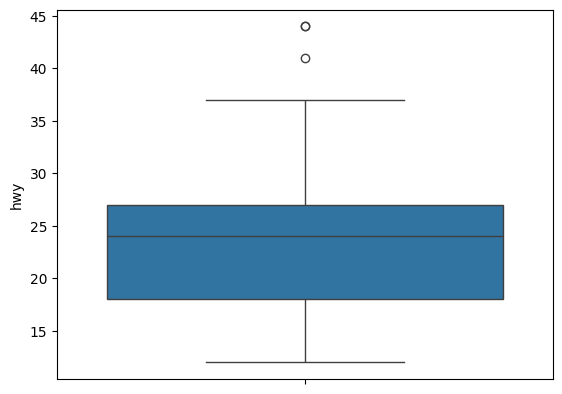

In [3]:
sns.boxplot(data=mpg, y='hwy')

In [4]:
pct25 = mpg['hwy'].quantile(.25)
pct25

np.float64(18.0)

In [5]:
pct75 = mpg['hwy'].quantile(.75)
pct75

np.float64(27.0)

In [6]:
iqr = pct75 - pct25
iqr

np.float64(9.0)

In [ ]:
#최소값

pct25 - 1.5*iqr

np.float64(4.5)

In [ ]:
#최대값

pct75 + 1.5*iqr

np.float64(40.5)

In [15]:
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])
mpg['hwy'].isna().sum()


np.int64(3)

In [18]:
mpg['hwy'].isna().sum()

np.int64(0)

In [19]:
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [21]:
#1p4 문제풀기 

mpg = pd.read_csv('./data/mpg.csv')
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

In [25]:
#1번 drv에 이상치가 있는지 확인하기 , 이상치를 결측 처리한 다음 이상치가 사라졌는지 
# 확인하고 이때 결측 처리 할 때는 df.isin()을 활용해라

mpg['drv'] = np.where((mpg['drv'] == "4") | (mpg['drv'] == "f") | (mpg['drv'] == "r" ), 
                      np.nan, mpg['drv'])



In [27]:
#p199

mpg = pd.read_csv('./data/mpg.csv')

<Axes: xlabel='displ', ylabel='hwy'>

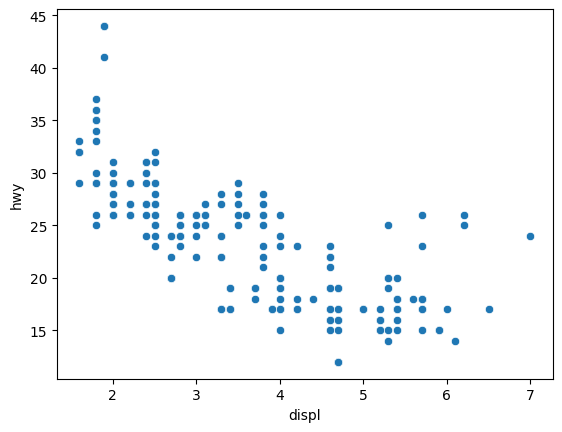

In [28]:
sns.scatterplot(data=mpg, x='displ', y='hwy')

[(3.0, 6.0), (10.0, 30.0)]

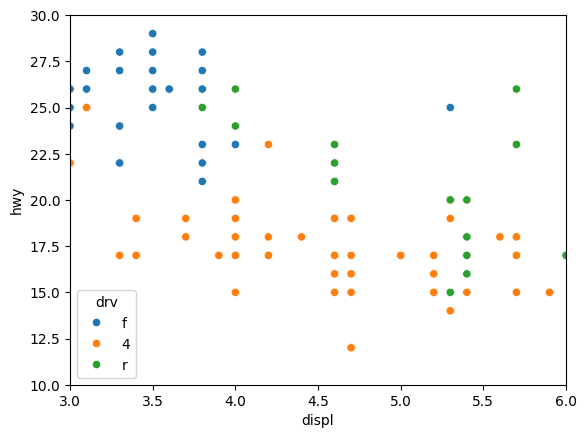

In [29]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv').set(xlim=(3,6), ylim = (10, 30))

In [30]:
#p206

df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

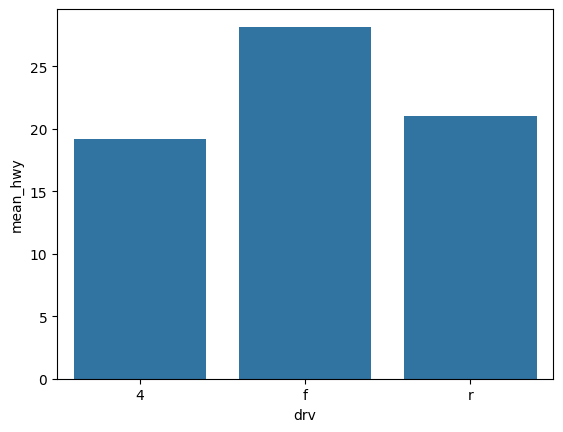

In [31]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

<Axes: xlabel='drv', ylabel='mean_hwy'>

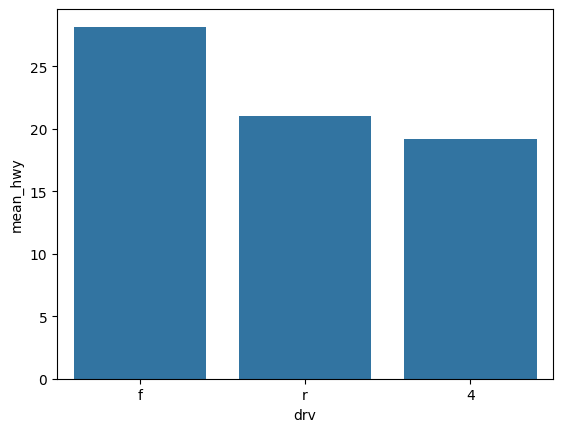

In [32]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

In [35]:
#p208
df_mpg = mpg.groupby('drv', as_index= False).agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='n'>

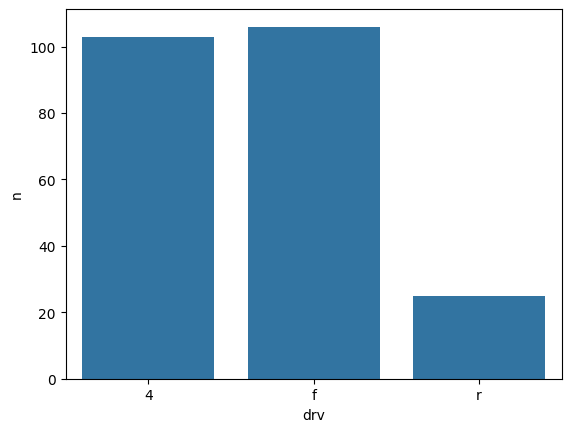

In [36]:
sns.barplot(data=df_mpg, x='drv', y='n')

<Axes: xlabel='drv', ylabel='count'>

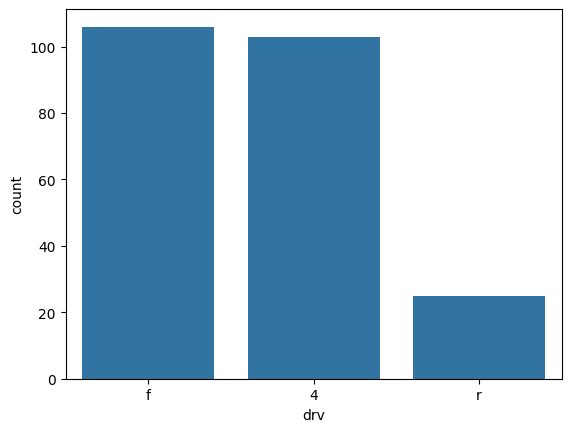

In [39]:
sns.countplot(data=mpg, x='drv')

<Axes: xlabel='drv', ylabel='count'>

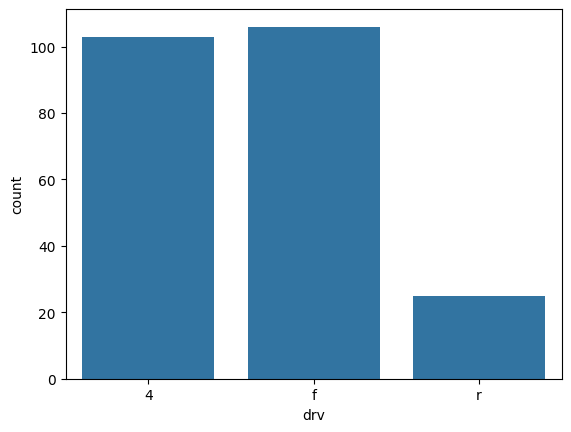

In [41]:
sns.countplot(data=mpg, x='drv', order= ['4', 'f', 'r'])

In [ ]:
#drv의 값을 빈도가 높은 순으로 출력  p211
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

<Axes: xlabel='drv', ylabel='count'>

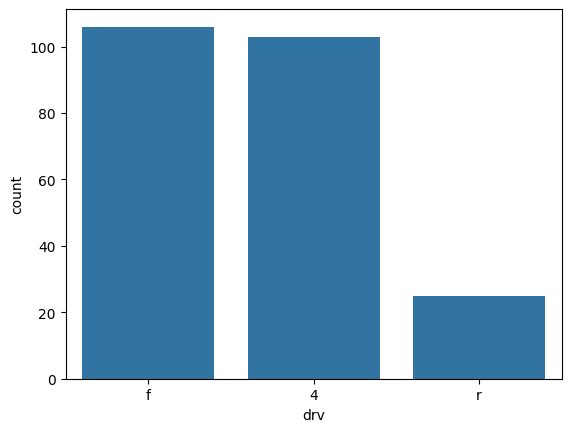

In [44]:
sns.countplot(data=mpg, x='drv', order= mpg['drv'].value_counts().index)

In [45]:
economics = pd.read_csv('./data/economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

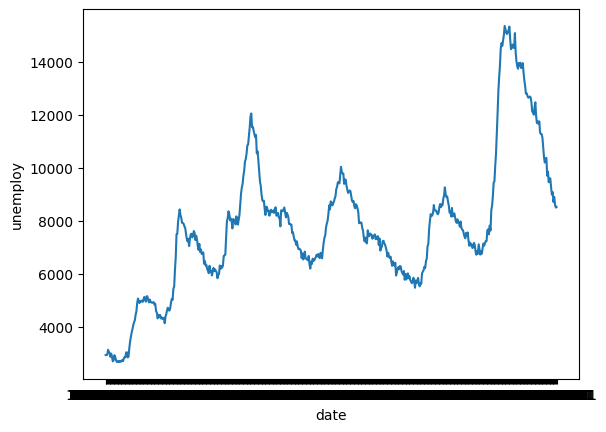

In [46]:
sns.lineplot(data=economics, x='date', y='unemploy')

In [47]:
#p214
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [49]:
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [50]:
#연 추출
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32

In [51]:
#월 추출
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32

In [52]:
#일 추출
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32

In [53]:
#p276
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

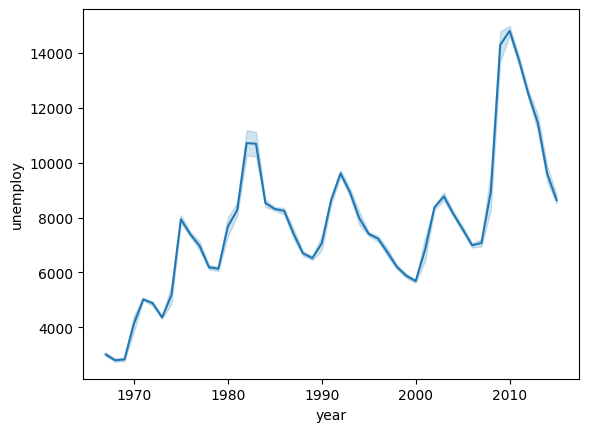

In [54]:
sns.lineplot(data=economics, x='year', y='unemploy')

C:\Users\pc04-18\AppData\Local\Temp\ipykernel_14396\1402641340.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=economics, x='year', y='unemploy', ci=None)


<Axes: xlabel='year', ylabel='unemploy'>

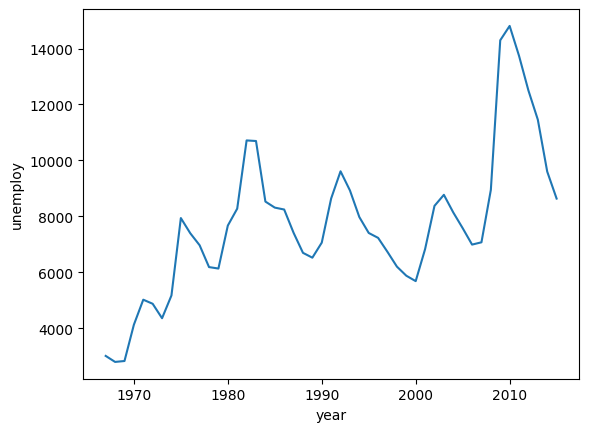

In [55]:
#신뢰구간 제거
sns.lineplot(data=economics, x='year', y='unemploy', ci=None)

<Axes: xlabel='drv', ylabel='hwy'>

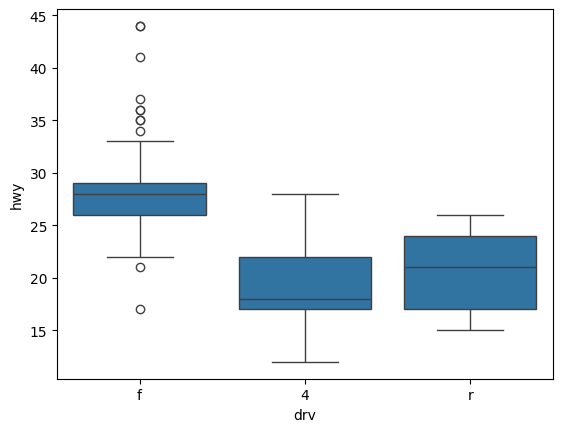

In [56]:
#p218 boxplot

sns.boxplot(data=mpg, x='drv', y='hwy')

In [ ]:
sns.s